# 1. Linear Regression Implementation



In [150]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [153]:
#load the dataset
df=pd.read_csv('dm.csv')

In [154]:
df.head(10)

,carat,cut,color,clarity,price,L,W,H
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,338,4.00,4.05,2.39


In [155]:
#l=length in mm
#w=width in mm
#h=depth in mm

In [156]:
df.shape

(49, 8)

In [157]:
#Extracting features (X=independent variable) and target variable (y)
x = df['L'].values
y = df['price'].values


In [158]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
# Adding a column of ones for the intercept term
x_train = np.vstack((np.ones_like(x_train), x_train)).T
x_test = np.vstack((np.ones_like(x_test), x_test)).T


In [160]:
# Function to perform linear regression
#WE ARE WRITING LINEAR REGRESSION ALGORITHM

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list


In [161]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)

In [11]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 134355.0107172832
Root Mean Squared Error (RMSE): 366.5446912960045
Mean Absolute Error (MAE): 365.68921577801774
R-squared: -20.373349249500198


In [12]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df)

   Actual Values  Predicted Values  Difference (Actual - Predicted)
0            344          6.835485                       337.164515
1            403          6.671796                       396.328204
2            403          6.850366                       396.149634
3            403          6.820604                       396.179396
4            351          6.656915                       344.343085
5            357          6.731319                       350.268681
6            355          6.270013                       348.729987
7            354          6.270013                       347.729987
8            402          6.374179                       395.625821
9            351          6.627153                       344.372847


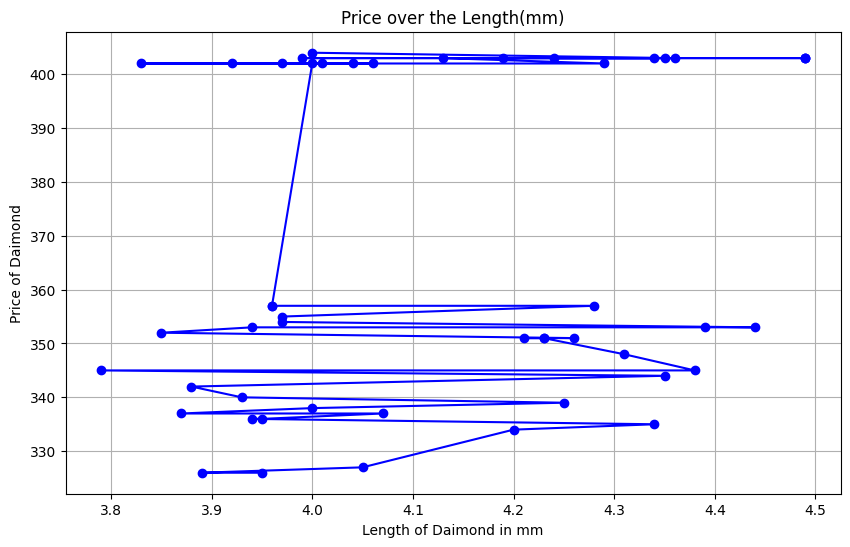

In [13]:

# Create a line chart

plt.figure(figsize=(10, 6))
plt.plot(df['L'], df['price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Length of Daimond in mm')
plt.ylabel('Price of Daimond')
plt.title('Price over the Length(mm)')
plt.grid(True)

# Display the plot
plt.show()


# 2.Decision Tree Implementation with Hyperparameter

In [97]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [99]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [100]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [101]:
df.shape

(20640, 9)

In [102]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [103]:
df.shape

(5160, 9)

In [104]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [105]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2314,6.9405,17.0,7.166667,1.009615,992.0,3.179487,36.88,-119.71
12615,5.0371,25.0,6.385656,1.008119,1857.0,2.512855,38.50,-121.51
8892,2.9934,35.0,3.349425,1.073563,1334.0,1.533333,34.02,-118.50
5842,3.0625,42.0,4.826667,0.993333,420.0,2.800000,34.19,-118.31
900,4.7500,35.0,5.513317,1.016949,1353.0,3.276029,37.53,-121.97


In [106]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [108]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [109]:
y_pred=regressor.predict(X_test)

In [110]:
y_pred

array([1.529, 2.477, 3.349, ..., 1.625, 0.734, 1.665])

In [111]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [112]:
score

0.5166630720031986

In [113]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [114]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [115]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [116]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [117]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [118]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [119]:
%matplotlib inline

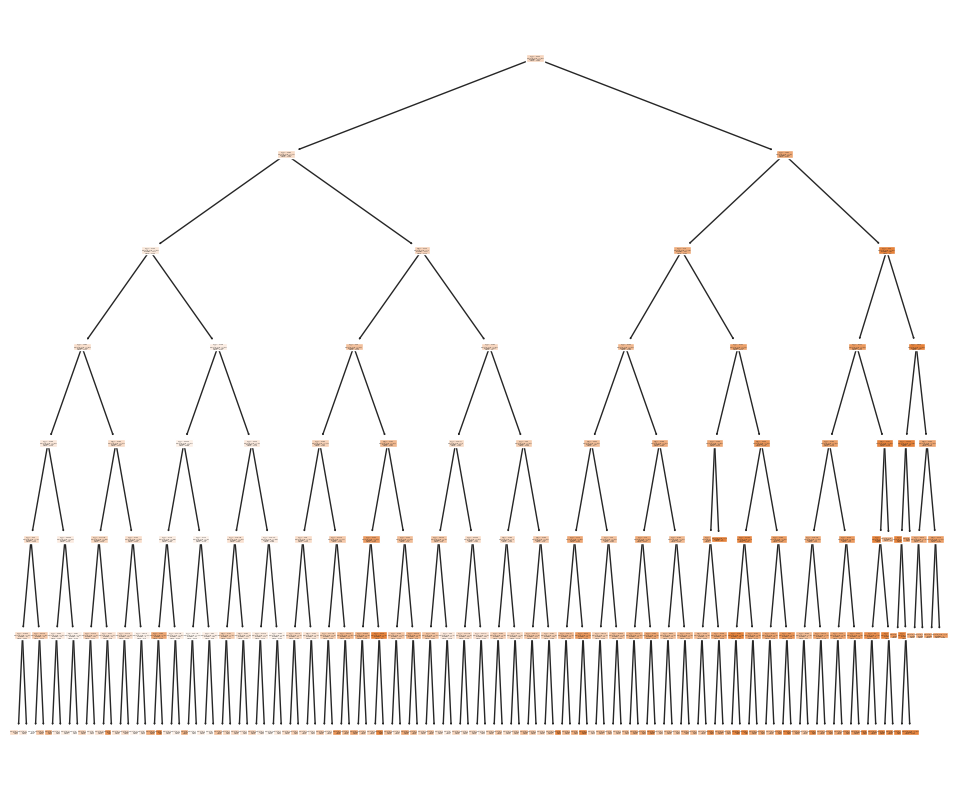

In [120]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()


In [121]:
y_pred=regressorcv.predict(X_test)

In [122]:
r2_score(y_pred,y_test)

0.4337635197037778

#3. Naive Bayes Implementation

In [60]:
#important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [63]:
#load dataset
df=pd.read_csv("Breast_cancer_data.csv")

In [64]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


<Axes: >

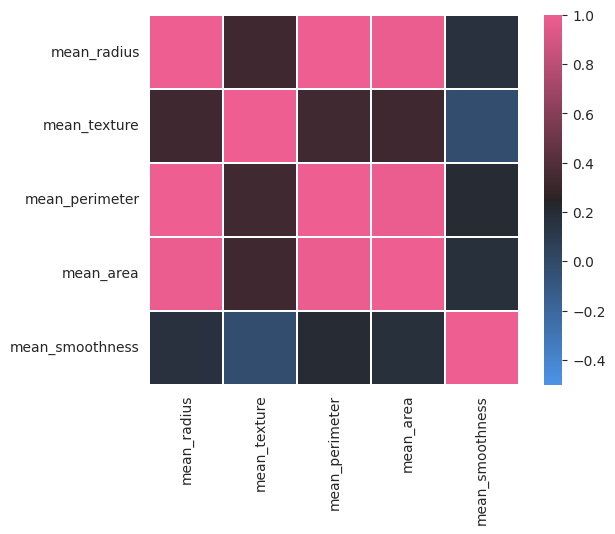

In [65]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [67]:
data = df[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)


,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


<Axes: xlabel='mean_texture', ylabel='Count'>

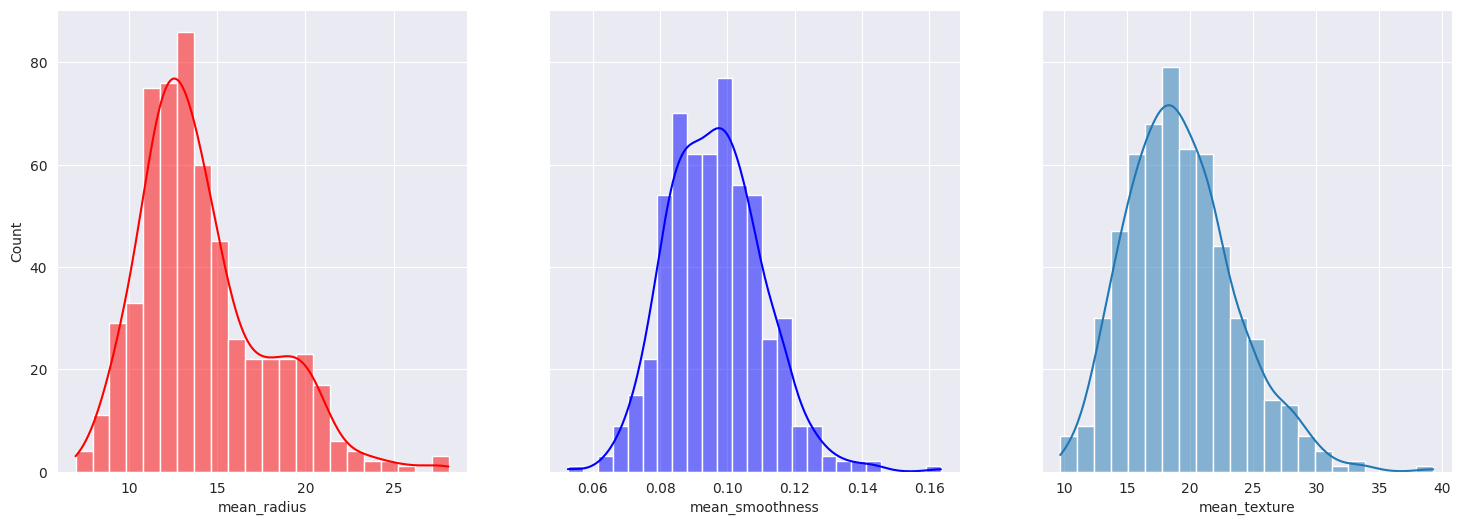

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)

In [70]:
#Calculate P(Y=y) for all possible y
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [71]:
#Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [72]:
#Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [73]:
#Test Gaussian model
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


In [74]:
#Convert continuous features to Categorical features
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


In [76]:
#Approach 2: Calculate P(X=x|Y=y) categorically
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

In [77]:
#Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [78]:
#Test Categorical model
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[38  2]
 [ 5 69]]
0.9517241379310345


#4. Support Vector Machine Implementation

In [123]:
#import Library
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [124]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [125]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Instantiate SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

In [127]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [128]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [129]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [130]:
# Print the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 6. handle missing values in machine learning


In [131]:
import pandas as pd
from sklearn.impute import SimpleImputer


In [132]:
# Load your dataset
df = pd.read_csv('test.csv')

In [133]:
# Identify missing values
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [137]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [140]:
# Impute missing values with mean
df.fillna(df.mean(), inplace=True)

# Impute missing values with median
df.fillna(df.median(), inplace=True)

In [141]:
# Identify missing values
print(df.isnull().sum())

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 80, dtype: float64


# 7. Plot three Graphs For Visualizations

##<font color='blue'>Scattrer Plot

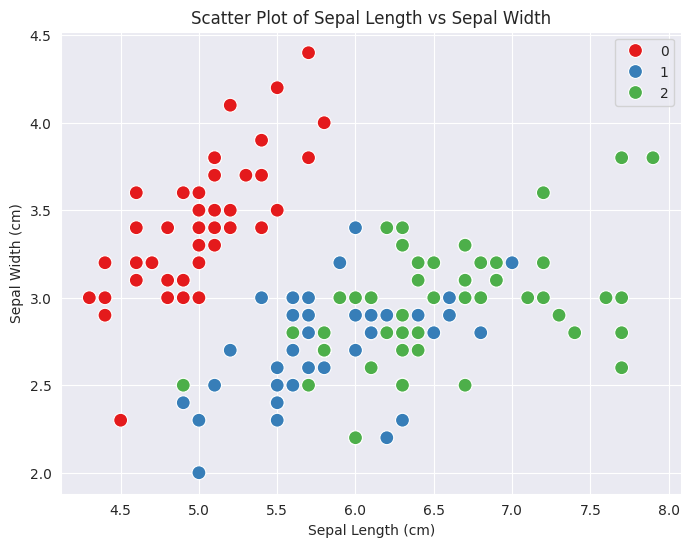

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='Set1', s=100)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='best')
plt.show()


##<font color='blue'>Histogram

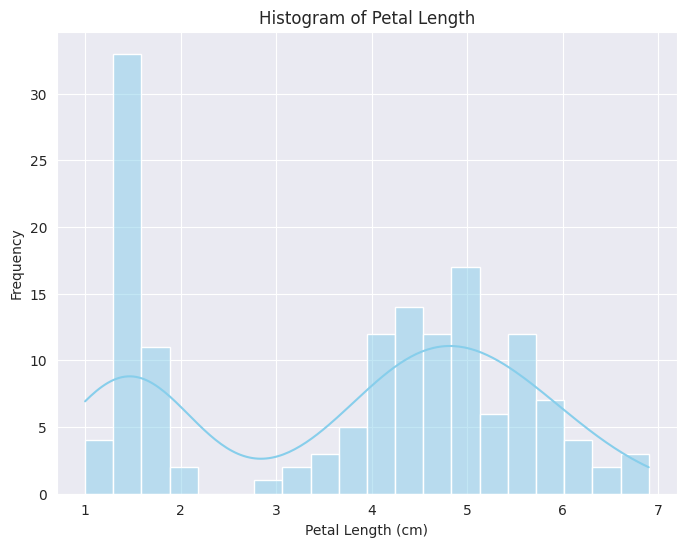

In [146]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['petal length (cm)'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

##<font color='blue'>Bar Graph

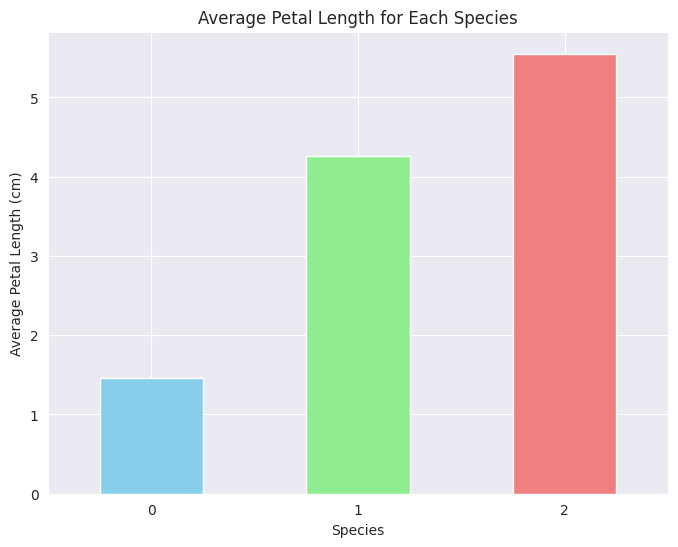

In [149]:
# Calculate average petal length for each species
average_petal_length = df.groupby('species')['petal length (cm)'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
average_petal_length.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Average Petal Length for Each Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.xticks(rotation=0)
plt.show()
